In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from backend import osaka_backend, transpiler_real_backend, sampler_real_backend, service
from topology import Node, Topology
from utils import save_obj

In [12]:
n_qubits = osaka_backend.num_qubits
nodes = [Node(i,[]) for i in range(n_qubits)]
topology = Topology(osaka_backend, nodes)
topology.map_nodes()

In [13]:
topology.traverse()
experiments = topology.get_experiments_paths()

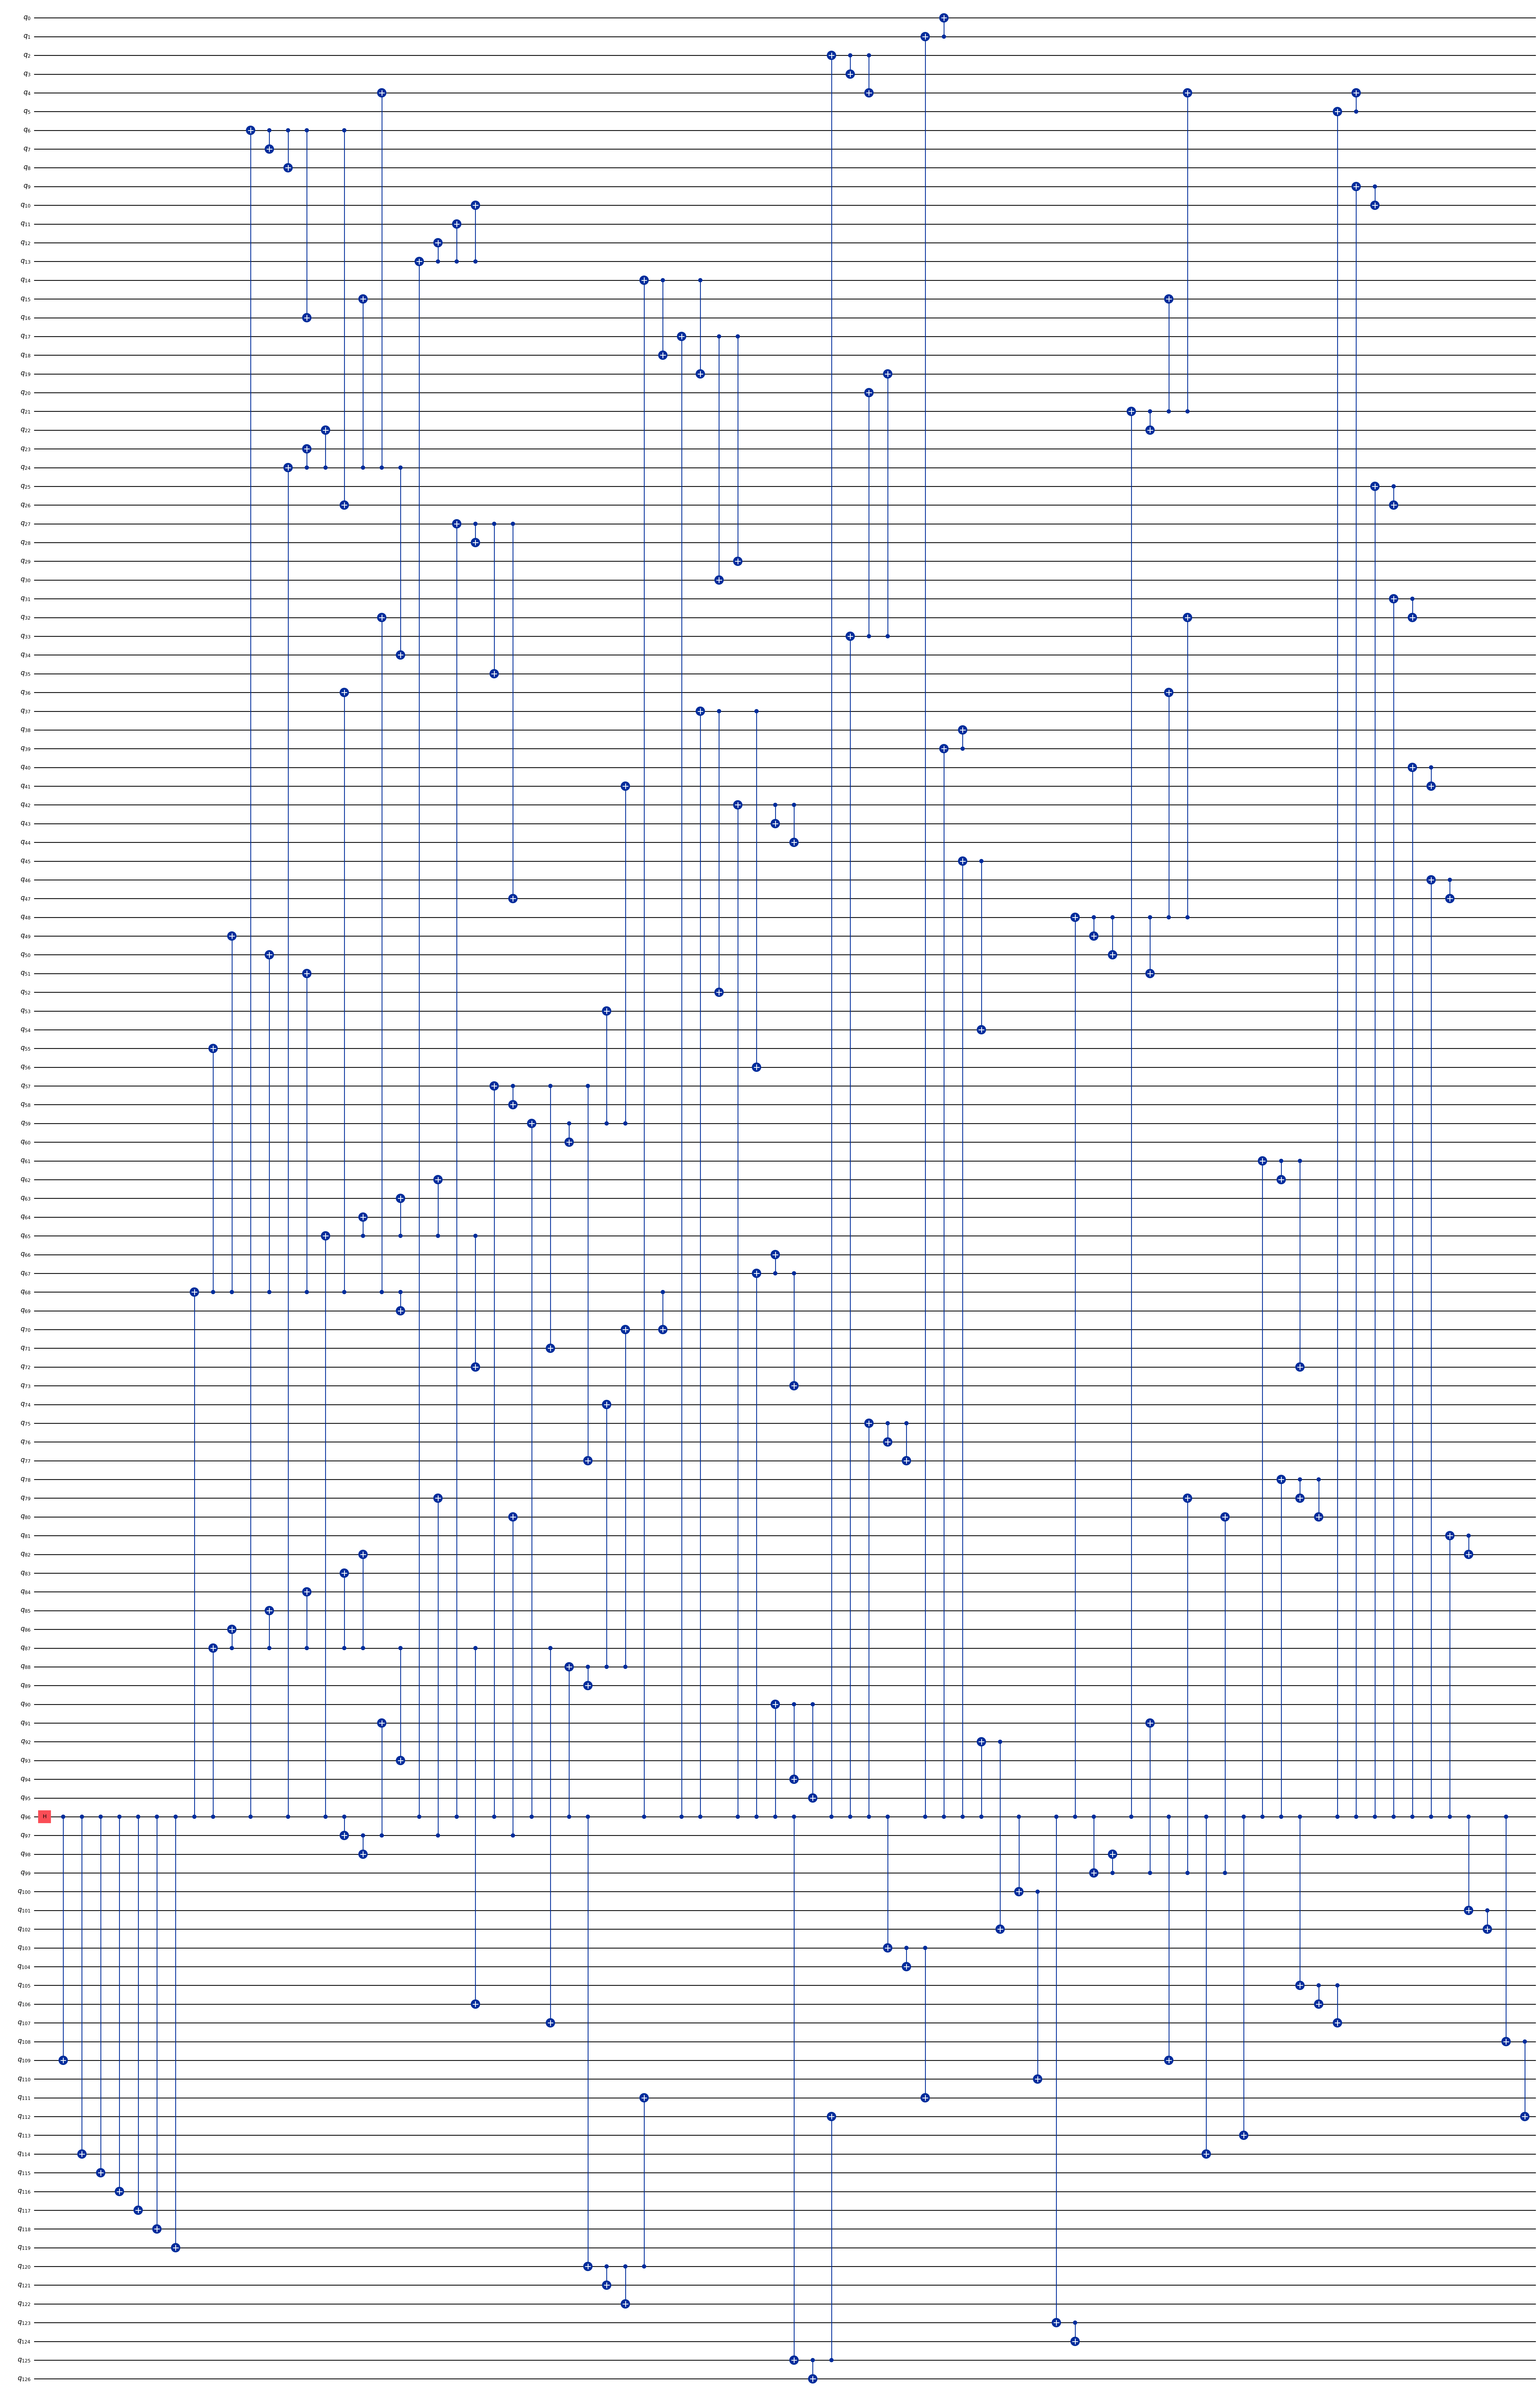

In [14]:
qc = QuantumCircuit(n_qubits)

superposition_node = experiments[0].nodes[0].value
qc.h(superposition_node)

superpositions = {superposition_node}

for i,experiment in enumerate(experiments):
    nodes = experiment.nodes
    first_node = nodes[0].value

    if(i != 0 and first_node not in superpositions):
        qc.cx(superposition_node, first_node)
        superpositions.add(first_node)
    
    for node_i in nodes[1:]:
        qc.cx(first_node, node_i.value)
        superpositions.add(node_i)
        
qc.draw('mpl', idle_wires=False, fold=-1, filename="127-qubits-GHZ-circuit.png")

In [15]:
qc.measure_all()
transpiled_qc = transpiler_real_backend.run(qc)
print(f'qc depth: {qc.depth()}')
print(f'transpiled qc depth: {transpiled_qc.depth()}')

qc depth: 57
transpiled qc depth: 1420


In [16]:
job = sampler_real_backend.run([transpiled_qc], shots=1000)
print(f"Job ID: {job.job_id()}")

Job ID: cthr87r4gjh0008ns850


In [17]:
job_data = {"id":job.job_id()}
save_obj(job_data, "127-qubits-job.json")

Saving object as JSON...


---

In [2]:
job = service.job("cthr87r4gjh0008ns850")

In [3]:
results = job.result()[0].data.meas.get_counts()
results

{'0001111010100010001110101100001111011110111100110101111001010000010100001000001111101110110100110001010101110000100111011010111': 1,
 '0100001111001001001110100101001110101101000100100111111101100001001101100100110101010011101101111010110011111000101100101100111': 1,
 '1011011101001010101001001110001111001101001111101001010101011111101001101010001110010100110100011100010110000100000001000000110': 1,
 '1011101111010001000110100001100001010011001101110000010000011000000000101011001100000101100001010111110000001100100110001000000': 1,
 '0111001110001100001011010110111001110011000001110100010001110100000000110010000100010101001010000111001010000111101011011111110': 1,
 '1111111100010101101001010010101011001011010000110000000001110011111001000011100000111000010111110101011110001100001111100101101': 1,
 '0000010101010100100010000000000001100010001111010000110110011100001010001000100100000111111111001011011111110001100001101100110': 1,
 '11000000010011101001011011111110010100101000000011010

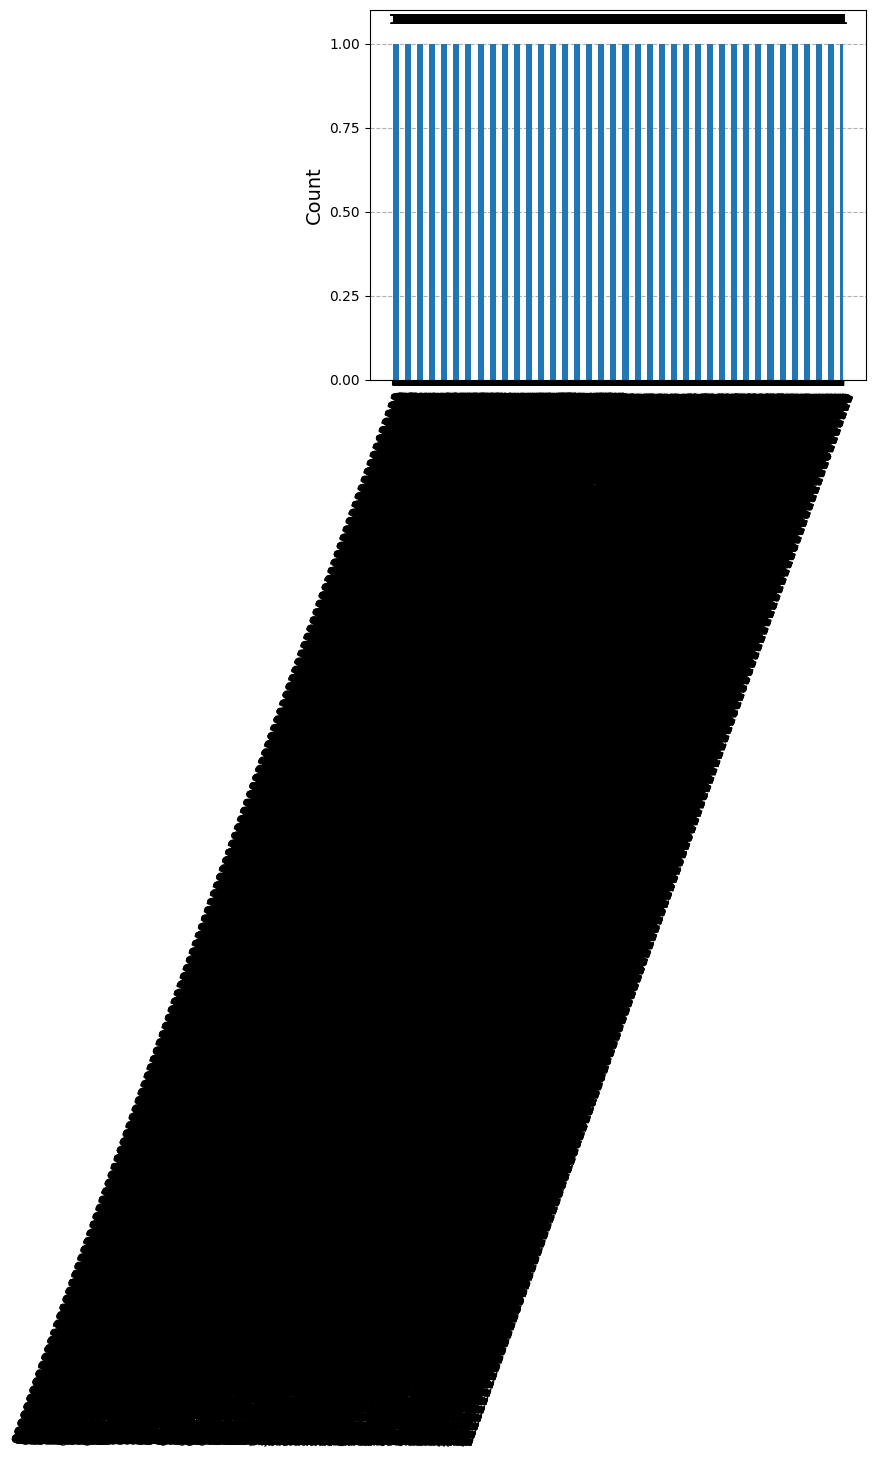

In [6]:
fig = plot_histogram(results)
fig.savefig("127-qubits-GHZ-counts.png", bbox_inches='tight')
display(fig)